In [13]:
# MODELING NOTEBOOK

import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# Load dataset
df = pd.read_csv("prepared_data.csv")

In [15]:
# --- Fix Salary column ---
df['Salary'] = pd.to_numeric(df['Salary'], errors='coerce')

# --- Remove invalid/negative salaries ---
df = df[df['Salary'] > 0]

# --- Optional: Remove extreme outliers using IQR ---
Q1 = df['Salary'].quantile(0.25)
Q3 = df['Salary'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['Salary'] >= lower_bound) & (df['Salary'] <= upper_bound)]

# --- Convert HireDate into numeric (Years of Service) ---
df['HireDate'] = pd.to_datetime(df['HireDate'], errors='coerce')
df['Years_of_Service'] = (pd.Timestamp.today() - df['HireDate']).dt.days // 365

# --- Define target ---
y = df['Salary']

# --- Select features ---
X = df[['Benefits_Cost', 'Years_of_Service']].copy()

# One-hot encode categorical features (Department, PositionTitle)
categorical_cols = ['Department', 'PositionTitle']
X = pd.concat([X, pd.get_dummies(df[categorical_cols], drop_first=True)], axis=1)

# Drop rows with missing values
df_model = pd.concat([y, X], axis=1).dropna()
y = df_model['Salary']
X = df_model.drop(columns=['Salary'])

# 🔑 Ensure everything is numeric
X = X.apply(pd.to_numeric, errors='coerce')
y = pd.to_numeric(y, errors='coerce')

# Drop any leftover NaNs
X = X.dropna()
y = y.loc[X.index]

# Add constant for intercept
X = sm.add_constant(X)

In [16]:
# --- Fit OLS regression ---
model = sm.OLS(y.astype(float), X.astype(float)).fit()

# --- Outputs ---
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Sat, 20 Sep 2025   Prob (F-statistic):                nan
Time:                        00:47:46   Log-Likelihood:                 182.24
No. Observations:                  10   AIC:                            -344.5
Df Residuals:                       0   BIC:                            -341.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

c:\Users\Shafia\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=10 observations were given.
  return hypotest_fun_in(*args, **kwds)
c:\Users\Shafia\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\regression\linear_model.py:1795: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
c:\Users\Shafia\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\regression\linear_model.py:1795: RuntimeWarning: invalid value encountered in scalar multiply
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
c:\Users\Shafia\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\regression\linear_model.py:1717: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


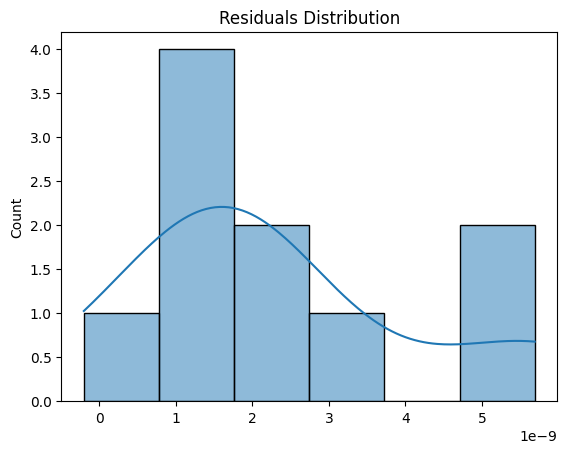

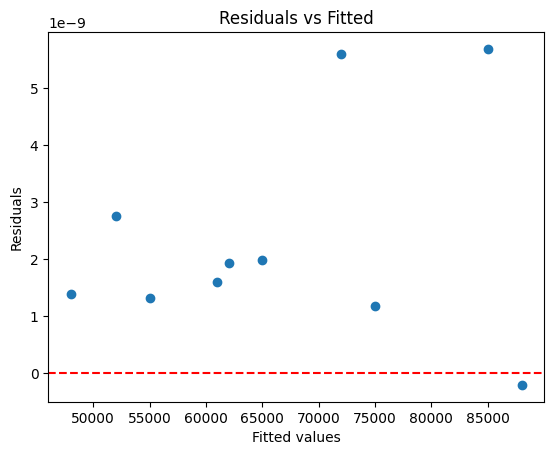

In [17]:
# Residual plot
residuals = model.resid
sns.histplot(residuals, kde=True)
plt.title("Residuals Distribution")
plt.show()

# Residuals vs Fitted
fitted = model.fittedvalues
plt.scatter(fitted, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted")
plt.show()

In [ ]:
# Uncomment if performing classification
# y = df['target_class']  # binary target column
# X = df.drop(columns=['target_class'])
# X = sm.add_constant(X)

# Fit logistic regression
# logit_model = sm.Logit(y, X).fit()
# logit_model.summary()

In [18]:
# Coefficients with confidence intervals
ci = model.conf_int()
coeffs = pd.DataFrame({
    "coef": model.params,
    "lower_ci": ci[0],
    "upper_ci": ci[1],
    "p_value": model.pvalues
})
coeffs

,coef,lower_ci,upper_ci,p_value
const,-1486.536575,NaN,NaN,NaN
Benefits_Cost,4.654041,NaN,NaN,NaN
Years_of_Service,-369.341918,NaN,NaN,NaN
Department_Fire,-323.054590,NaN,NaN,NaN
Department_IT,899.971955,NaN,NaN,NaN
Department_Library,3338.711882,NaN,NaN,NaN
Department_Parks & Rec,2438.739927,NaN,NaN,NaN
Department_Police,1002.222112,NaN,NaN,NaN
Department_Public Works,3695.438823,NaN,NaN,NaN
Department_Water,-735.163168,NaN,NaN,NaN


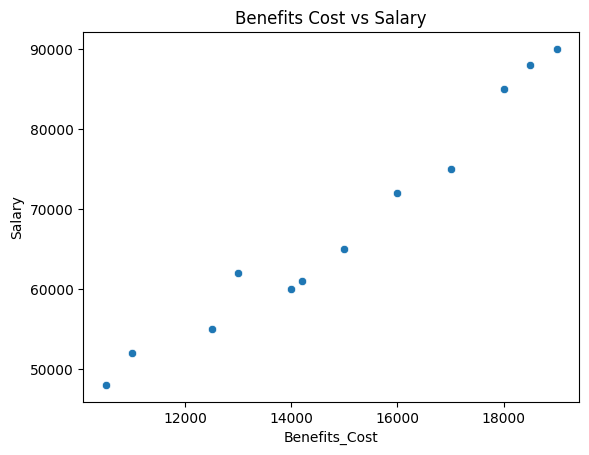

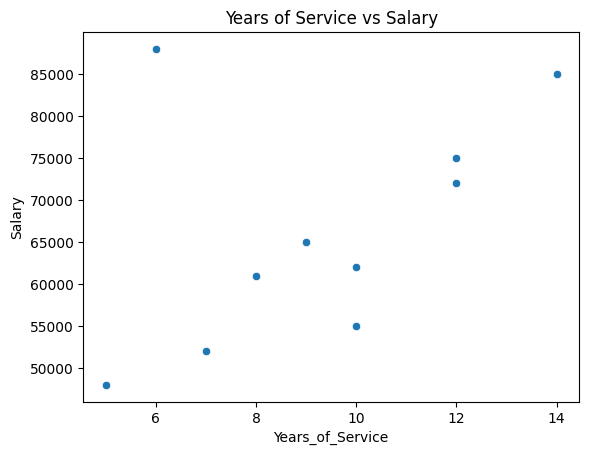

In [21]:
# Scatter plot of Benefits_Cost vs Salary
sns.scatterplot(x='Benefits_Cost', y='Salary', data=df)
plt.title("Benefits Cost vs Salary")
plt.show()

# Scatter plot of Years_of_Service vs Salary
if 'Years_of_Service' in df.columns:
    sns.scatterplot(x='Years_of_Service', y='Salary', data=df)
    plt.title("Years of Service vs Salary")
    plt.show()
